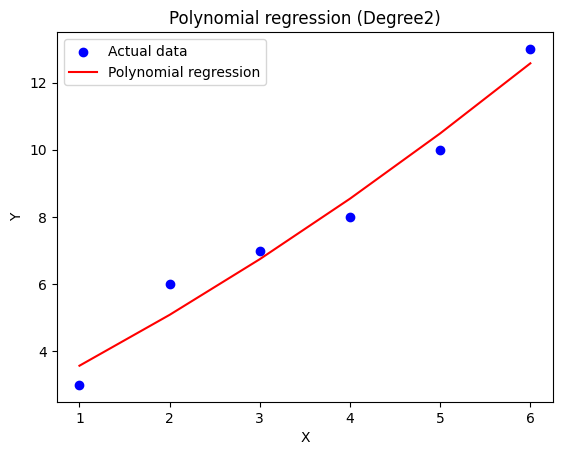

Accuracy: 0.9669769324160259
R2 Score: 0.9669769324160259


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#Inbuilt dataset - Random data for demonstration
x = np.array([1, 2, 3, 4, 5, 6]).reshape((-1, 1))
y1 = np.array([3, 6,7, 8, 10, 13])
#Polynomial Regression
degree = 2   #Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y1)
y_poly_pred = model2.predict(x_poly)
#calculate accuracy and R2
accuracy = model2.score(x_poly, y1)
r2 = r2_score(y1, y_poly_pred)
#plotting the polynomial regression results
plt.scatter(x, y1, color='blue', label='Actual data')
plt.plot(x, y_poly_pred, color = 'red', label='Polynomial regression')
plt.title(f'Polynomial regression (Degree{degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Accuracy: {accuracy}")
print(f"R2 Score: {r2}")

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import load_iris
import pandas as pd

data=load_iris()
x = data.data[:,:3]
y=data.data[:, 3]

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

y_pred_lasso=lasso_model.predict(x_test)

ridge_model=Lasso(alpha=0.1)
ridge_model.fit(x_train,y_train)

y_pred_ridge=ridge_model.predict(x_test)

mse_lasso=mean_squared_error(y_test,y_pred_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)

mse_ridge=mean_squared_error(y_test,y_pred_ridge)
r2_ridge=r2_score(y_test,y_pred_ridge)
print("Lasso Regression")
print("Mean Squared Error:",mse_lasso)
print("R-Squared Error",r2_lasso)

print("Ridge Regression")
print("Mean Squared Error:",mse_ridge)
print("R-Squared Error",r2_ridge)

Lasso Regression
Mean Squared Error: 0.05175534674071506
R-Squared Error 0.9185795730275943
Ridge Regression
Mean Squared Error: 0.05175534674071506
R-Squared Error 0.9185795730275943


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
import pandas as pd

data=load_iris()
x = data.data
y=data.target

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

clf=SVC()

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

cmtx=confusion_matrix(y_test,y_pred)

crep=classification_report(y_test,y_pred)


print("Confusion matrix",cmtx)
print("classification report",crep)

Confusion matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy: 1.0


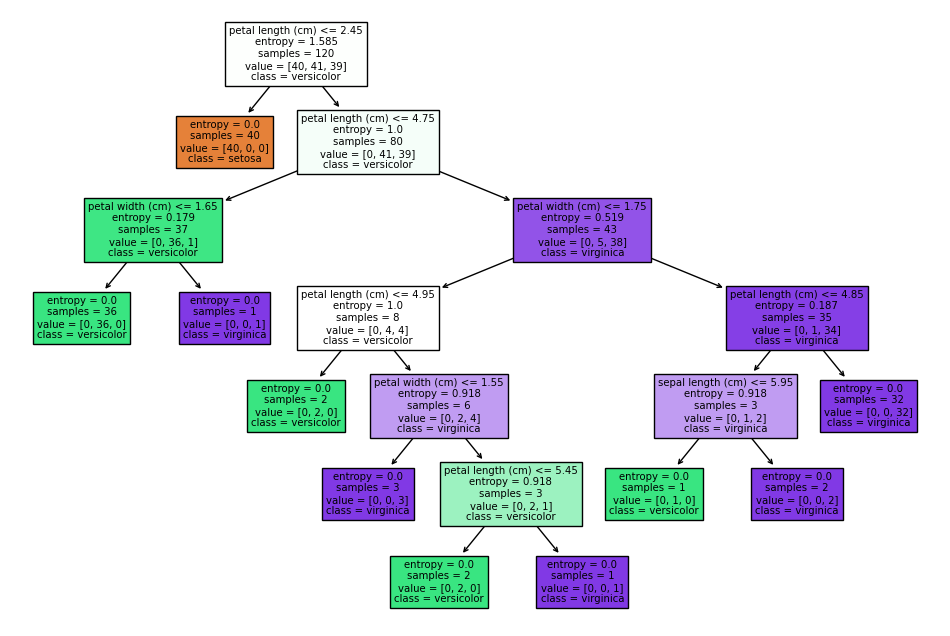

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

#Predict on the test set
Y_pred = model.predict(X_test)

# Predict the accuracy of the model
accuracy = np.mean(Y_pred == Y_test)
print("Accuracy:",accuracy)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

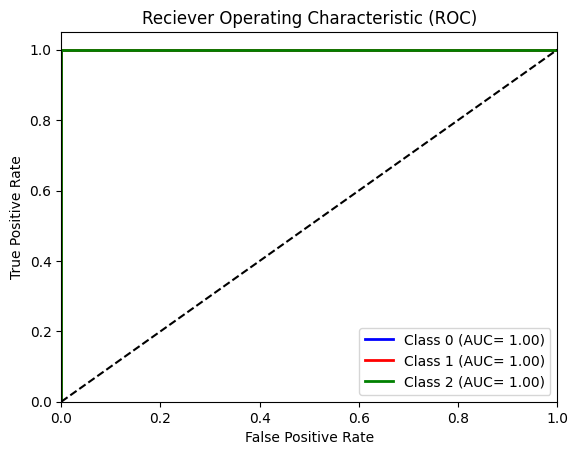

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,f1_score,precision_score, recall_score, roc_curve, auc
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data=load_iris()
x=data.data
y=data.target


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
confusion_mtx = confusion_matrix(y_test,y_pred)

classification_rep = classification_report(y_test,y_pred)

precision = precision_score(y_test,y_pred,average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

probs=clf.predict_proba(x_test)
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(data.target_names.shape[0]):
    fpr[i],tpr[i],_=roc_curve((y_test==i),probs[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

plt.figure()
colors=['blue','red','green']
for i in range(data.target_names.shape[0]):
    plt.plot(fpr[i],tpr[i],color=colors[i], lw=2, label=f"Class {i} (AUC= {roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:\n", confusion_mtx)
print("\nClassification Report:\n", classification_rep)
print("\nPrecision:", precision)
print("Recall:",recall)
print("F1 Score:",f1)
